In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Recap: Comparisons with arrays

In [2]:
pets = make_array('cat', 'dog', 'cat', 'cat', 'dog', 'rabbit')

In [3]:
pets == 'dog'

array([False,  True, False, False,  True, False])

In [4]:
sum(pets == 'dog')

2

In [5]:
pets > 'cat'

array([False,  True, False, False,  True,  True])

In [6]:
sum(pets > 'cat')

3

## Recap: Predicates and advanced `where`

In [7]:
terms = Table().with_column('Semester', np.arange(1, 9))
terms

Semester
1
2
3
4
5
6
7
8


In [8]:
terms.where('Semester', are.above(6))

Semester
7
8


In [9]:
terms.where([False, False, False, False, False, False, True, True])

Semester
7
8


#### Conditional Statements 

In [10]:
def year_from_semesters(x):
    if x <= 0:
        return 'Not a valid input'
    elif x <= 2:
        return 'First Year'
    elif x <= 4:
        return 'Sophomore'
    elif x <= 6:
        return 'Junior'
    elif x <= 8:
        return 'Senior'
    else:
        return "NA"

In [11]:
year_from_semesters(-15.6)

'Not a valid input'

In [12]:
year_from_semesters(5)

'Junior'

In [13]:
year_from_semesters(9001)

'NA'

In [14]:
terms.with_column('Year', terms.apply(year_from_semesters, 'Semester'))

Semester,Year
1,First Year
2,First Year
3,Sophomore
4,Sophomore
5,Junior
6,Junior
7,Senior
8,Senior


## Appending Arrays ##

In [15]:
first = np.arange(1, 6)
second = np.arange(6, 11)

In [16]:
first

array([1, 2, 3, 4, 5])

In [17]:
np.append(first, 30)

array([ 1,  2,  3,  4,  5, 30])

In [18]:
np.append(first, second)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [19]:
first

array([1, 2, 3, 4, 5])

In [20]:
first_second = np.append(first, second)
first_second

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Random Selection ##

In [21]:
two_groups = make_array('treatment', 'control')
two_groups

array(['treatment', 'control'], dtype='<U9')

In [22]:
np.random.choice(two_groups)

'control'

In [23]:
np.random.choice(two_groups)

'treatment'

In [24]:
np.random.choice(two_groups, 10)

array(['treatment', 'treatment', 'control', 'control', 'control',
       'control', 'treatment', 'treatment', 'control', 'control'],
      dtype='<U9')

In [25]:
sum(np.random.choice(two_groups, 100) == 'treatment')

56

In [26]:
sum(np.random.choice(two_groups, 100) == 'control')

54

In [27]:
outcomes = np.random.choice(two_groups, 10)

In [28]:
outcomes

array(['treatment', 'treatment', 'control', 'control', 'control',
       'control', 'treatment', 'control', 'control', 'control'],
      dtype='<U9')

In [29]:
sum(outcomes == 'treatment')

3

In [30]:
sum(outcomes == 'control')

7

### A simple experiment

In [31]:
coin = ['heads', 'tails']

In [32]:
np.random.choice(coin)

'tails'

In [33]:
tosses = np.random.choice(coin, 100)
tosses

array(['heads', 'heads', 'heads', 'heads', 'tails', 'heads', 'tails',
       'tails', 'heads', 'tails', 'tails', 'heads', 'heads', 'heads',
       'tails', 'tails', 'heads', 'tails', 'heads', 'heads', 'tails',
       'tails', 'tails', 'heads', 'tails', 'tails', 'heads', 'heads',
       'heads', 'heads', 'tails', 'tails', 'heads', 'tails', 'tails',
       'heads', 'heads', 'heads', 'tails', 'tails', 'tails', 'tails',
       'heads', 'heads', 'tails', 'tails', 'heads', 'tails', 'heads',
       'heads', 'heads', 'heads', 'tails', 'tails', 'heads', 'tails',
       'tails', 'tails', 'heads', 'tails', 'heads', 'heads', 'tails',
       'tails', 'tails', 'heads', 'tails', 'tails', 'heads', 'tails',
       'heads', 'tails', 'tails', 'heads', 'tails', 'heads', 'tails',
       'tails', 'tails', 'tails', 'heads', 'heads', 'heads', 'tails',
       'heads', 'heads', 'heads', 'tails', 'heads', 'tails', 'heads',
       'tails', 'tails', 'heads', 'tails', 'tails', 'heads', 'tails',
       'tails', 'tai

In [34]:
sum(tosses == 'heads')

47

In [35]:
outcomes = make_array()

In [36]:
outcomes

array([], dtype=float64)

In [37]:
np.append(outcomes, sum(np.random.choice(coin, 100) == 'heads'))

array([41.])

In [38]:
outcomes

array([], dtype=float64)

In [39]:
outcomes = np.append(outcomes, sum(np.random.choice(coin, 100) == 'heads'))
outcomes

array([44.])

## `For` Statements

In [40]:
for yale in np.arange(4):
    print(yale**2)

# This is the loop "unrolled"
print(0**2)
print(1**2)
print(2**2)
print(3**2)

0
1
4
9
0
1
4
9


In [41]:
outcomes = make_array()

for i in np.arange(7):
    outcomes = np.append(outcomes, sum(np.random.choice(coin, 100) == 'heads'))
outcomes





array([53., 48., 58., 45., 55., 49., 45.])

In [42]:
outcomes = make_array()

for i in np.arange(10000):
    outcomes = np.append(outcomes, sum(np.random.choice(coin, 100) == 'heads'))

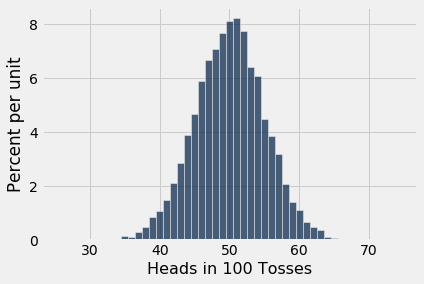

In [43]:
Table().with_column(
    'Heads in 100 Tosses', outcomes
).hist(bins = np.arange(25.5, 75.5))

Now you get to try.  Instead of tossing a coin 100 times, suppose you roll TWO 6-sided dice and consider the sum of their outcomes.  
What is the estimated **probability** that the sum is less than or equal to 5?  Use 10,000 runs of your experiment to estimate this.
Hints:  
1.  You will need to define the possible outcomes of 1,...,6
2.  Then use the possible outcomes with np.random.choice twice - one for each roll.

In [44]:
#Outcomes
roll = np.arange(1,7)
roll


array([1, 2, 3, 4, 5, 6])

In [45]:
#Two rolls
np.random.choice(roll,2)

array([2, 5])

In [46]:
#Sum of two rolls
sum(np.random.choice(roll,2))

3

In [47]:
#Setup iterations
outcomes = make_array()

for i in np.arange(10000):
    total = sum(np.random.choice(roll,2))
    outcomes = np.append(outcomes, total <= 5)
    
outcomes_average = sum(outcomes)/len(outcomes)
outcomes_average


0.279

In [48]:
#Another option
roll1 = np.random.choice(roll,10000)
roll2 = np.random.choice(roll,10000)
total = roll1+roll2
outcomes_under_five = total <= 5
sum(outcomes_under_five)/len(total)





0.2788

### Let's apply some of our new skills to the Covid-19 data

We'll first process the data as just as we did in last class. Then, we'll sample from all of the counties, and display that subset. We'll also use a loop to create a more informative label for each bubble in the map.


In [49]:
covid_table = Table.read_table("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
county_geo = Table.read_table("https://raw.githubusercontent.com/jdlafferty/covid-19/master/data/geo-counties.csv") 


In [50]:
first_date = '2021-02-20'

# Some subsets of states to visualize:
all_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

states = all_states

recent_data = covid_table.where('date', are.above(first_date))
recent_state_data = recent_data.where('state', are.contained_in(states))


In [51]:
# remove extra columns
data = recent_state_data.drop('date').drop('county').drop('state').drop('deaths')

# exclude cases where fips is not known
data = data.where('fips', are.above(0))

# now, group by fips and form a list of the cumlative cases
data = data.group('fips', list)

# apply the difference function np.diff to get the new cases
data = data.with_column('new cases', data.apply(np.diff, 'cases list'))
data = data.drop('cases list')

# Now average to get the average new cases in each county over the past week
# We add a small amount .001 to avoid zeros, which the graphics handles badly 
new_cases = Table().with_columns('fips', data['fips'], 
                                 'new cases', data.apply(np.mean, 'new cases') + .001)


In [52]:
state_geo = county_geo.where('state', are.contained_in(states)).sort('fips')
new_cases_geo = state_geo.join('fips', new_cases)
new_cases_geo = new_cases_geo.drop('fips')
new_cases_geo

county,state,lat,lon,new cases
Autauga,Alabama,32.5077,-86.651,19.126
Baldwin,Alabama,30.7698,-87.7827,40.626
Blount,Alabama,34.0128,-86.5337,7.501
Bullock,Alabama,32.0927,-85.7129,2.251
Butler,Alabama,32.0894,-88.2213,3.501
Calhoun,Alabama,33.7623,-85.8421,45.001
Chambers,Alabama,32.9188,-85.3938,5.751
Cherokee,Alabama,34.7555,-87.9734,2.126
Chilton,Alabama,32.866,-86.6652,11.376
Choctaw,Alabama,32.004,-88.2858,0.626


In [53]:
n = new_cases_geo.num_rows

# A random sample of 100 counties across the US:
rows = np.random.choice(np.arange(n), 100)
sample = new_cases_geo.take(rows)

labels = []
for i in np.arange(sample.num_rows):
    s = sample['county'][i] + " County, " + \
        sample['state'][i] + ": " + \
        str(np.round(sample['new cases'][i],1))
    labels.append(s)

dat = Table().with_columns('lat', sample['lat'], 
                           'long', sample['lon'], 
                           'labels', labels,
                           'areas', 10*sample['new cases'],
                           'colors', 'red')
Circle.map_table(dat, weight=1)